# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

## Importing Librairies

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import RobustScaler


In [391]:
# OPEN CSV FILE
df_train = pd.read_csv('./data/train.csv')
df_train.head()


,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


In [392]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,5,40,1,4,2,10,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
1,14,41,1,3,3,10,0,5,0,4,...,0,0,0,0,0,0,0,0,0,0
2,16,33,1,2,3,8,0,7,0,2,...,0,0,0,0,1,0,0,0,0,0
3,26,33,1,3,3,8,0,6,1,2,...,0,0,0,0,1,0,0,0,0,0
4,28,40,1,3,3,10,0,3,0,6,...,0,0,0,0,1,0,0,0,0,0


## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [393]:
# CHECK FOR DUPLICATES VALUES

# LENGTH OF TRAIN
len(df_train)

4107

In [394]:
# SEARCH FOR DUPLICATES VALUES AND DROP THEM
df_train.drop_duplicates(inplace=True)


print(f'{len(df_train)} is the final length of our data, so no duplicated values have been found')

4107 is the final length of our data, so no duplicated values have been found


In [395]:
# CHECK FOR MISSING VALUES
round(df_train.isnull().sum().sort_values(ascending=False) / len(df_train), 2)

Id     0.0
V56    0.0
V64    0.0
V63    0.0
V62    0.0
      ... 
V28    0.0
V27    0.0
V26    0.0
V25    0.0
Buy    0.0
Length: 87, dtype: float64

In [396]:
for i in df_train.columns:
    print(i, df_train[i].unique())

Id [   1    2    3 ... 5819 5820 5822]
V2 [33 37  9 23 39 11 10 38 22 13 31 34 24  7 41  8  3 36 25 35 29 32  1 26
  2 30 40 12 16  4  6 18 21 27 20 28  5 17 15 19]
V3 [ 1  2  3 10  5  7  6]
V4 [3 2 4 1 5]
V5 [2 3 1 4 5 6]
V6 [ 8  3  5  9  7  2 10  1  6  4]
V7 [0 1 2 3 4 6 5 9 7 8]
V8 [5 4 3 2 7 1 6 0 8 9]
V9 [1 2 0 3 4 5]
V10 [3 4 5 2 6 7 0 1 9 8]
V11 [7 6 3 5 0 1 9 8 2 4]
V12 [0 2 6 1 4 3 5 7]
V13 [2 4 3 0 6 1 5 7 8 9]
V14 [1 0 4 2 3 5 6 7 8 9]
V15 [2 4 3 5 6 1 0 7 8 9]
V16 [6 5 2 4 3 1 7 9 8 0]
V17 [1 0 3 4 2 5 6 7 8 9]
V18 [2 5 4 3 1 7 6 0 8 9]
V19 [7 4 2 5 6 8 3 1 9 0]
V20 [1 0 4 2 6 3 5 7 9 8]
V21 [0 1 2 5 3 4]
V22 [1 0 3 2 4 5 6 8 7 9]
V23 [2 5 7 3 4 1 9 0 6 8]
V24 [5 0 1 2 8 3 4 6 7 9]
V25 [2 4 5 1 3 0 7 6 9 8]
V26 [1 0 3 2 5 6 7 4 9 8]
V27 [1 2 5 0 3 4 8 6 9 7]
V28 [2 3 0 1 4 6 5 7 8 9]
V29 [6 5 4 8 0 1 2 7 3 9]
V30 [1 0 2 5 3 4 7 6 9]
V31 [1 2 7 5 9 6 0 4 8 3]
V32 [8 7 2 4 0 3 9 5 1 6]
V33 [8 7 9 5 4 6 3 2 1 0]
V34 [0 1 3 4 2 5 6 7]
V35 [1 2 0 3 4 6 7 5 8 9]
V36 [8 6 9 7 5 4 

In [397]:
print('No missing data have been found, so we have nothing to do with the dataframe')

No missing data have been found, so we have nothing to do with the dataframe


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


In [398]:
# Feature
X = df_train.drop(columns=['Buy', 'Id'])
# Target
y = df_train[['Buy']]

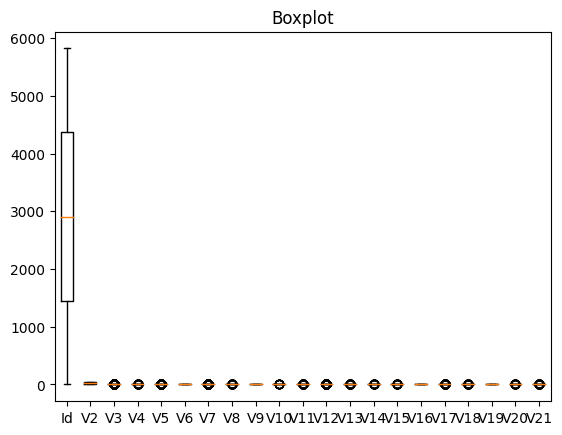

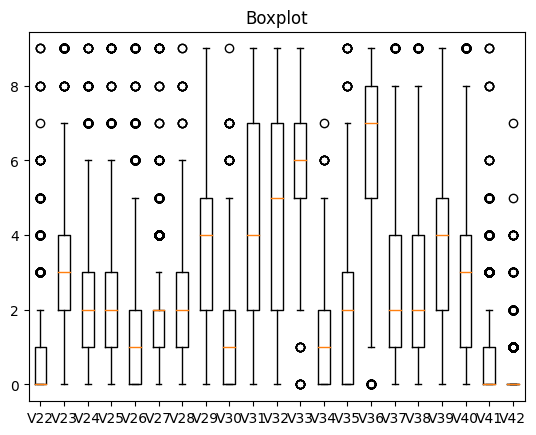

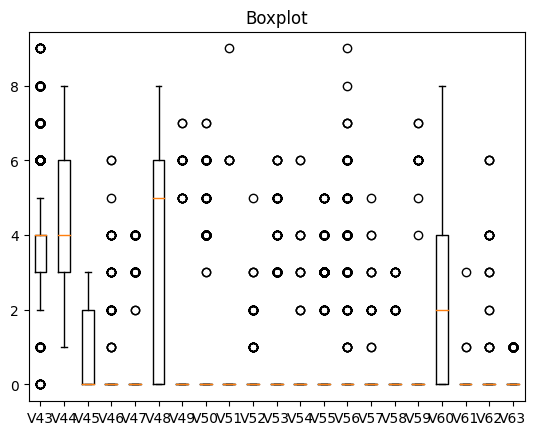

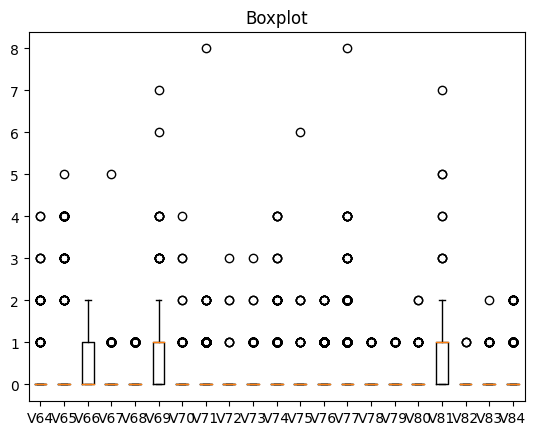

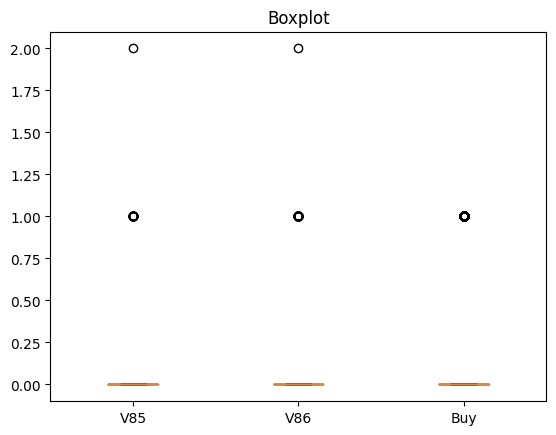

In [399]:
# LOOKING FOR OUTLIER WITH BOXPLOT AND MATPLOTLIB

# fig, ax = plt.subplots()
# ax.boxplot(y.values)
# ax.set_xticklabels(range(1, 86))
# plt.show()

# AS WE CANNOT SHOW 86 COLUMNS IN ONE FIGURES
# WE SEPARATE THE DATA INTO MULTIPLES GROUP OF COLUMNS 
column_group = [df_train.columns[i:i+21] for i in range(0, len(df_train.columns), 21)]

# THEN WE CONSTRUCT ALL THE BOXPLOT
for i, groupe in enumerate(column_group):
    fig, ax = plt.subplots()
    ax.boxplot(df_train[groupe].values)
    ax.set_xticklabels(groupe)
    ax.set_title(f"Boxplot")
    plt.show()

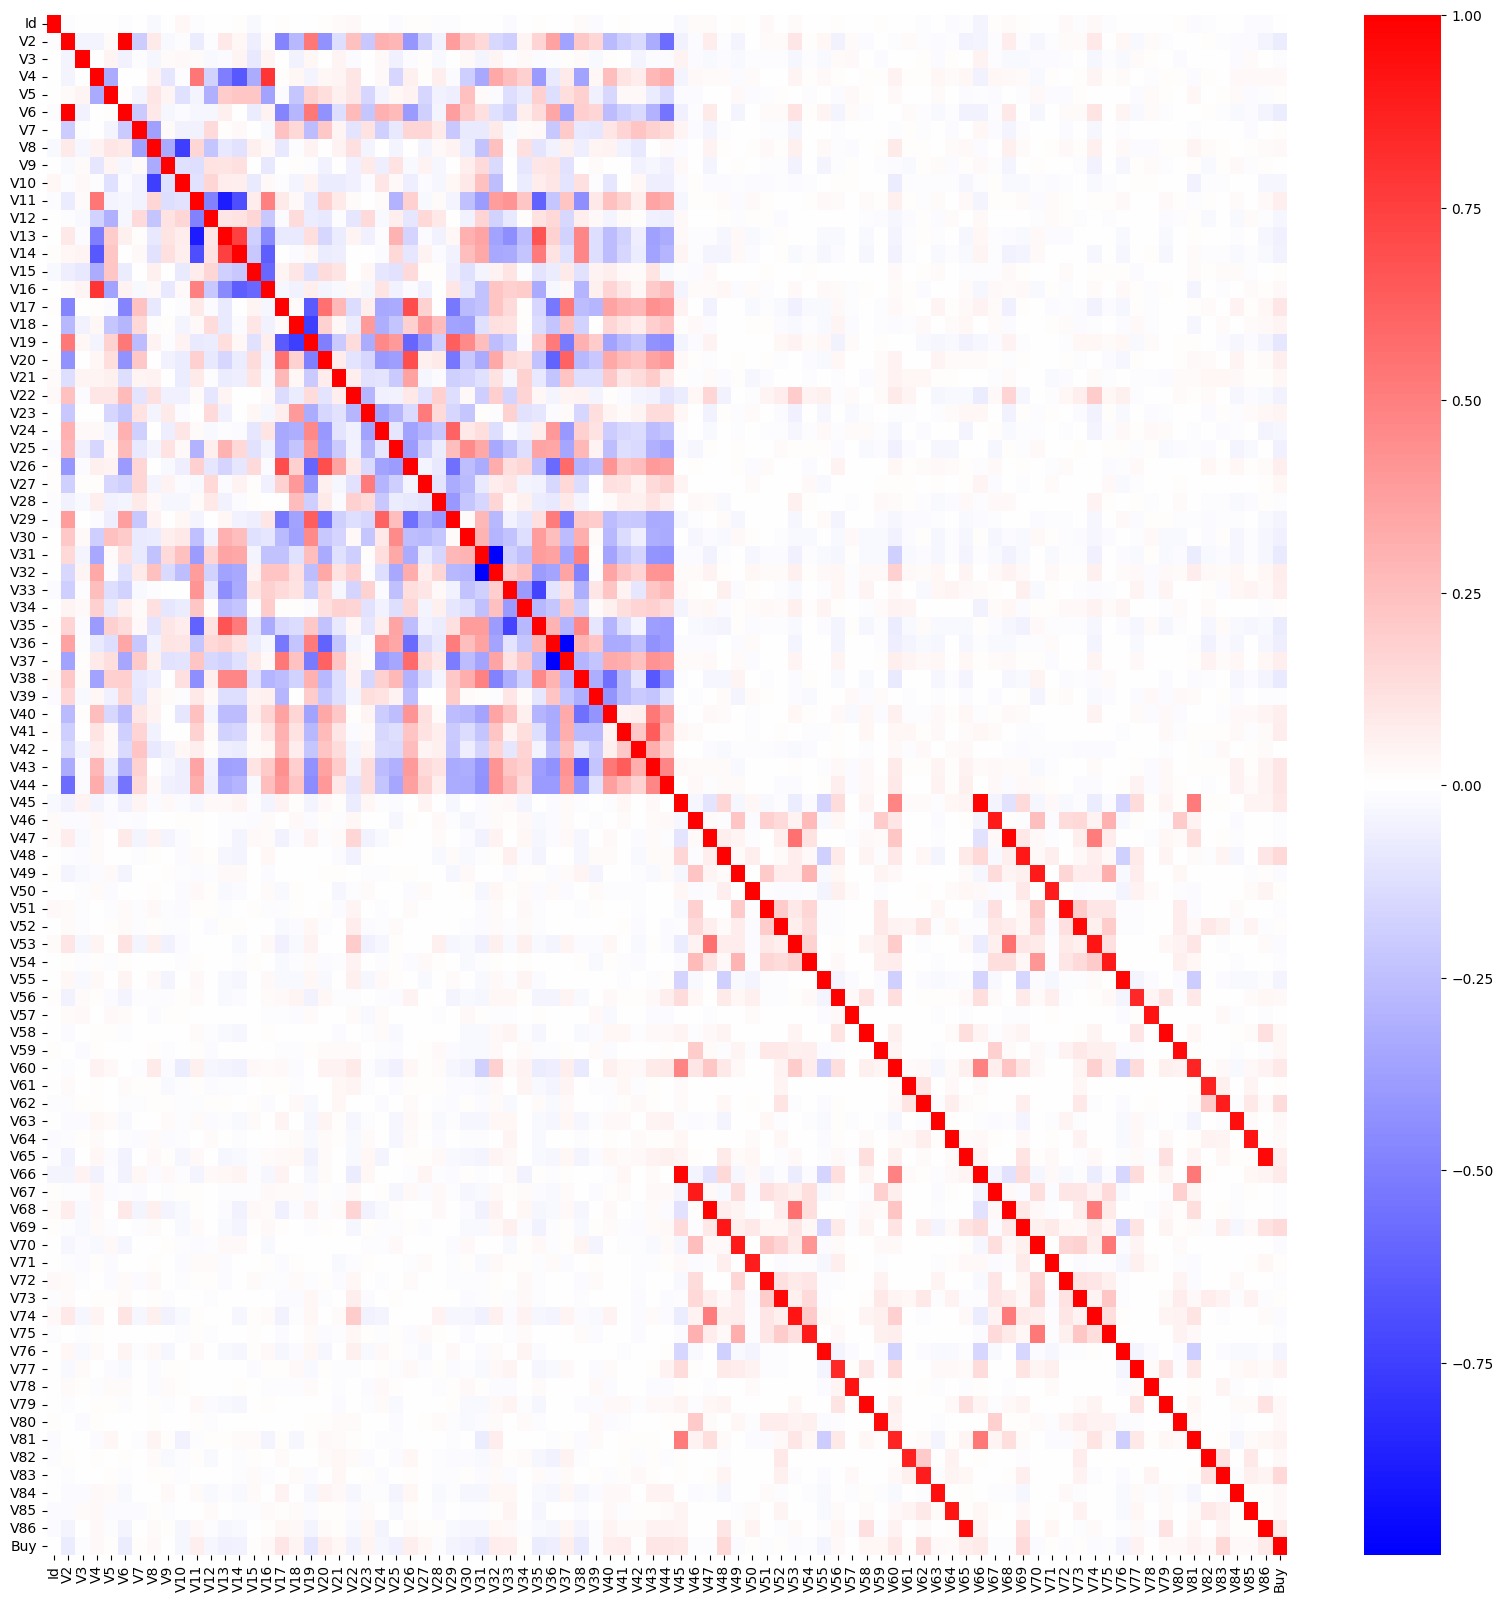

In [400]:
# CHECK CORRELATION BETWEEN PRINCIPALE 
plt.figure(figsize=(20, 20))

corr = df_train.corr()
# Heatmap
sns.heatmap(corr, cmap= 'bwr')
plt.show()

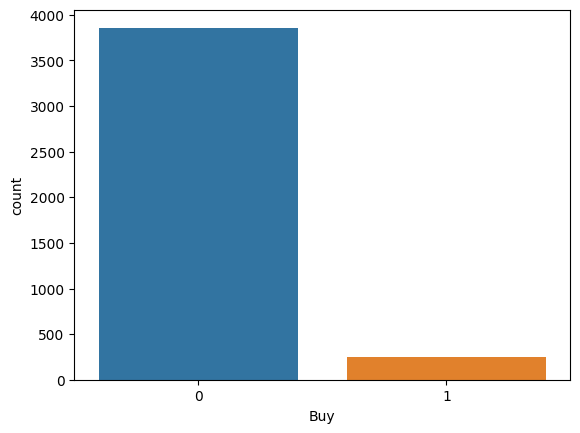

In [401]:
# SHOW PLOT DISTRIBUTION OF TARGET (BUY)
sns.countplot(y, x='Buy')
plt.show()

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

HERE WE HAVE A VERY LARGE AMOUNT OF 0 (NO BUYING) (ALMOST 4000) AGAINST (>500) OF BUYING 
SO WE ARE IN AN UNDERSAMPLING


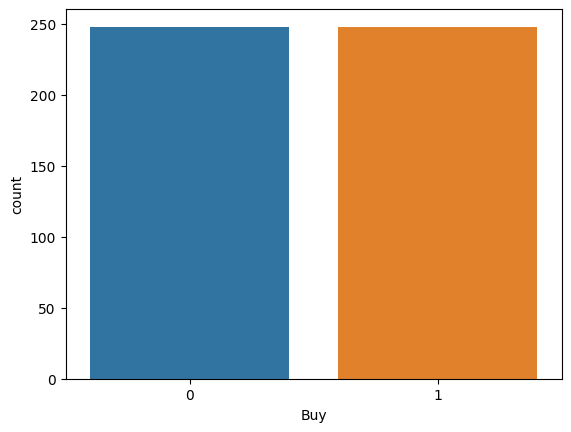

Now we can see that we have same amount of buying and unbuying data


In [402]:
print("HERE WE HAVE A VERY LARGE AMOUNT OF 0 (NO BUYING) (ALMOST 4000) AGAINST (>500) OF BUYING ")
print("SO WE ARE IN AN UNDERSAMPLING")

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

x_undersampler, y_undersampler = rus.fit_resample(X, y)
x_undersampler, y_undersampler

sns.countplot(y_undersampler, x='Buy')
plt.show()

print("Now we can see that we have same amount of buying and unbuying data")

## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


In [403]:
# Train our data model
X_train, X_test, y_train, y_test = train_test_split(x_undersampler, y_undersampler, test_size=0.3)

Here is the score of the DummyModel 0.5033557046979866
Here is the predict [0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1
 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1
 0]

Accuracy score: 0.48322147651006714
Recall score: 0.5166666666666667
Precision score: 0.3924050632911392
F1 score: 0.4460431654676259


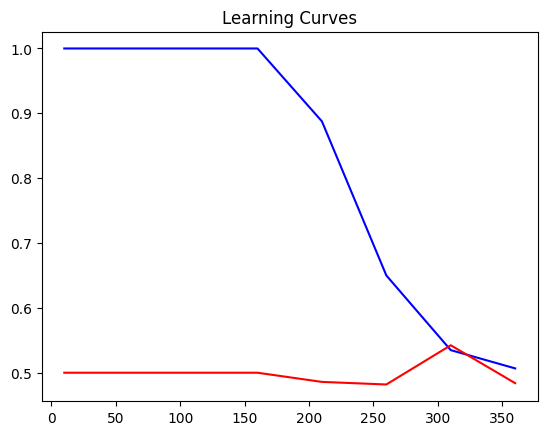

With the learning curves we can see that the Test Score doesn't learn


In [404]:
from sklearn.dummy import DummyClassifier

# DUMMY MODEL
dm = DummyClassifier(strategy="stratified")

# Calculate the score of the Dummy Classifier
dm.fit(X_train, y_train)
print(f"Here is the score of the DummyModel {dm.score(X_test, y_test)}")

# Show the predict
y_pred_dummy = dm.predict(X_test)
print(f"Here is the predict {y_pred_dummy}")

accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"\nAccuracy score: {accuracy}")
recall = recall_score(y_test, y_pred_dummy)
print(f"Recall score: {recall}")
precision = precision_score(y_test, y_pred_dummy)
print(f"Precision score: {precision}")
f1 = f1_score(y_test, y_pred_dummy)
print(f"F1 score: {f1}")


# Learning Curves
train_sizes = np.arange(10, 400, 50)
train_sizes, train_scores, test_scores = learning_curve(
    estimator = dm,
    X = x_undersampler, 
    y = y_undersampler,
    cv = 5,
    train_sizes=train_sizes
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label = 'Training Score', color="b")
plt.plot(train_sizes, test_scores_mean, label = 'Test Score', color="r")
plt.title('Learning Curves')
plt.show()

print("With the learning curves we can see that the Test Score doesn't learn")

Logistic Regression Score: 0.6249090909090909

Accuracy score: 0.6249090909090909
Recall score: 0.6285714285714286
Precision score: 0.6247715780256456
F1 score: 0.6264334185649354


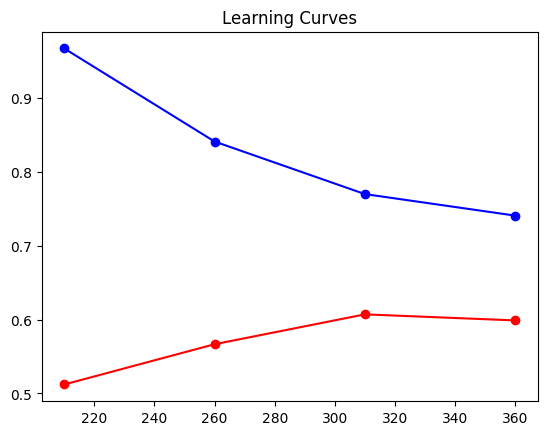

In [405]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(x_undersampler, y_undersampler.values.ravel())

# Cross Validation Score
cv_result_score = cross_val_score(logisticRegression, x_undersampler, y_undersampler.values.ravel(), cv=5)
print(f"Logistic Regression Score: {cv_result_score.mean()}")
cv_result = cross_validate(logisticRegression, x_undersampler, y_undersampler.values.ravel(), cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'])
print(f"\nAccuracy score: {np.mean(cv_result['test_accuracy'])}")
print(f"Recall score: {np.mean(cv_result['test_recall'])}")
print(f"Precision score: {np.mean(cv_result['test_precision'])}")
print(f"F1 score: {np.mean(cv_result['test_f1'])}")

# Learning Curves
train_sizes_lr = np.arange(10, 400, 50)
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    estimator = logisticRegression,
    X = x_undersampler, 
    y = y_undersampler.values.ravel(),
    cv = 5,
    train_sizes=train_sizes_lr
)

train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)

plt.figure()
plt.plot(train_sizes_lr, train_scores_mean_lr, label = 'Training Score', color="b", marker = 'o')
plt.plot(train_sizes_lr, test_scores_mean_lr, label = 'Test Score', color="r", marker = 'o')
plt.title('Learning Curves')
plt.show()

In [406]:
print("We can see that between the two Model we have a better score using the Logistical Regression")

We can see that between the two Model we have a better score using the Logistical Regression


In [407]:
# Here we are going to use our model with the file test.csv
df_test_without_id = df_test.drop(columns=['Id'])
prediction = pd.Series(logisticRegression.predict(df_test_without_id)).value_counts()

print(prediction)

0    1142
1     573
Name: count, dtype: int64



**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve

In [409]:
# Optionals

# Here we'll try to improve by modifying our features
rb_scaler = RobustScaler()
x_undersampler_rb = rb_scaler.fit_transform(x_undersampler)
cv_score = cross_val_score(logisticRegression, x_undersampler_rb, y_undersampler.values.ravel(), cv=5)

print(f'After a scale of the values, score: {cv_score.mean()}')

After a scale of the values, score: 0.6249494949494949


In [419]:
# Using Random Forest Regression found on the internet 
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(x_undersampler, y_undersampler.values.ravel())

cv_score = cross_val_score(rfg, x_undersampler, y_undersampler.values.ravel(), cv=5)
print(f"With this model the score is way lower than hopped {cv_score.mean()}")


With this model the score is way lower than hopped 0.011110283959183653


# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.